# Distribution Sampling and Simulations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Generating numbers from a Distribution Curve

This section will provide methods to generate random numbers from any valid probability density function utilizing a uniform distribution of random numbers made from simpler processes by creating a cumulative distribution function and mapping the random numbers to it.

In [ ]:
def normal_pdf(x,mu,sigma):
  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

Firstly, a probability density function must be made. In this case, a normal distribution with mean and standard deviation as parameters is used.

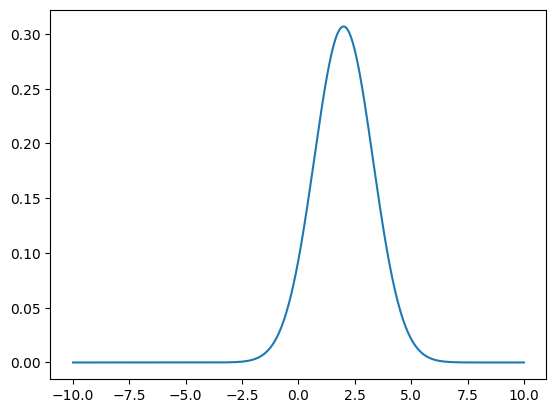

In [ ]:
x = np.linspace(-10,10,10001)
mu = 2
sigma = 1.3
pdf = normal_pdf(x,mu,sigma)

plt.plot(x,pdf)
plt.show()

The next step is to map the given PDF into a cumulative density function by taking the cumulative sum of all its points.

In [ ]:
def cumulative_sum(x):
  y = np.zeros(x.shape)
  for n in range(x.shape[0]):
    y[n] = np.sum(x[0:n])
  y/=max(y)
  return y

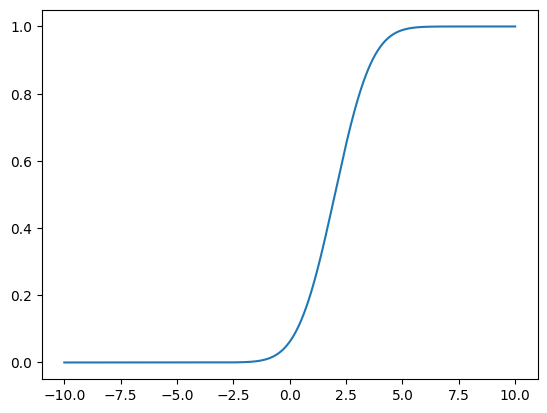

In [ ]:
cdf = cumulative_sum(pdf)
plt.plot(x,cdf);

Finally, the CDF can be sampled; to visualize how this is done, take a random number from 0 to 1 and find the point on the CDF closest to that y-value on the above chart. The x-value of that point is then the appropriate output, allowing a uniformly distributed random variable to be converted to another distribution.

In [ ]:
def find_nearest(array, value):
  return np.argmin(np.abs(array - value))

The below cell is an example of this. To represent this, using the 68-95-99.7 rule will return whole numbers.

To get approximate whole-number standard deviations for any normal distribution,
- 0.84 and 0.16 should give about 1 and -1,
- 0.025 and 0.975 should give about 2 and -2,
- and 0.0015 and 0.9985 should give about 3 and -3.


In [ ]:
number_to_convert = .0015
output = round(x[find_nearest(cdf, number_to_convert)],3)
print('Probability',number_to_convert,'corresponsd to',round((output-mu)/sigma,3),'standard deviations from the mean, or a value of',output)

Probability 0.0015 corresponsd to -2.968 standard deviations from the mean, or a value of -1.858


Finally, we can sample the distribution en masse; taking a large amount of random samples, the output histogram yields the given distribution.


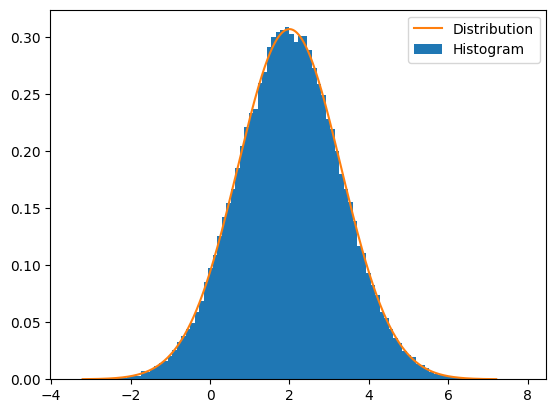

In [ ]:
xr = np.random.random(100000,)
w = np.zeros(xr.shape[0])
for i in range(xr.shape[0]):
  w[i] = x[find_nearest(cdf, xr[i])]

plt.hist(w,100,density=1)
plt.plot(x[pdf>0.0001],pdf[pdf>0.0001])
plt.legend(['Distribution','Histogram'])
plt.show()

## Simulations

By using random numbers and simple logic, various scenarios can be simulated rapidly in large numbers to approximate chances that would otherwise take complex math to find.

In [ ]:
import random

In [ ]:
# Number of simulations to use for each of the following examples
simulations = 10000

### Birthday Paradox

The birthday problem is that the chance of two people in a randomly selected group of *n* size is usually surprisingly high! Generally, only 23 people are needed to have a 50% chance of any two sharing a birthday. This quickly rises to 90% at 41 people, and so on.

In [ ]:
def simulate_birthday_paradox(people, simulations):
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

In [ ]:
people = 23
probability = simulate_birthday_paradox(people, simulations)
print('Based on',simulations,'simulations, there is a',str(round(probability*100,3))+'%','chance of a shared birthday in a group of',people,'people.')

Based on 10000 simulations, there is a 51.23% chance of a shared birthday in a group of 23 people.


### Monty Hall

This example shows the chances of winning a car in the finale of *Let's Make a Deal* if you choose to switch your chosen door or stick with it.

In [ ]:
def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
print('Chance to win staying:',str(round(final_probability_staying*100,2))+'%')
print('Chance to win switching:',str(round(final_probability_switching*100,2))+'%')

Chance to win staying: 32.29%
Chance to win switching: 67.71%


### Simple Craps

This example simulates a large amount of games of casino craps to estimate the chance of winning, taking into account instant results from specific rolls and rerolling until either getting a 7 or the initial roll.

In [ ]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
print(simulations,'simulations yielded a',str(round(final_probability_staying*100,2))+'%','chance of winning')

10000 simulations yielded a 32.29% chance of winning


### Collector's Card Paradox


This example simulates how many card packs are needed to collect all characters in a collector's card game with a given amount of characters.

Additionally, you can specify the number of cards each pack yields to see how that effects the amount of packs needed.

In [ ]:
def simulate_card_collectors_problem(n, m, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_cards = [random.randint(1, n) for _ in range(m)]
            for card in new_cards:
              collected_characters.add(card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

In [ ]:
characters = 10
cards_per_pack = 1
expected_card_packs = simulate_card_collectors_problem(characters, cards_per_pack, simulations)
print('Based on',simulations,'simulations, you\'d need',round(expected_card_packs,2),'packs of',cards_per_pack,'card' if cards_per_pack == 1 else 'cards','to collect all',characters,'characters in a collecting game.')

Based on 10000 simulations, you'd need 29.28 packs of 1 card to collect all 10 characters in a collecting game.


### Sock Drawer Problem

This example estimates how many draws it would take to get both socks of a given color when you have `n` different pairs of socks in a drawer.

In [ ]:
def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

In [ ]:
sock_pairs = 20
expected_draws = simulate_sock_drawer_problem(sock_pairs, simulations)
print('Based on',simulations,'simulations, in a drawer with',sock_pairs,'pairs of socks, you need to pick out',round(expected_draws,2),'random socks to get a complete pair.')

Based on 10000 simulations, in a drawer with 20 pairs of socks, you need to pick out 6.29 random socks to get a complete pair.
